In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import seaborn as sns
import matplotlib.cm as cm
from matplotlib import colormaps
from matplotlib.colors import Normalize

In [38]:
database = pd.read_csv('car_prices.csv')
database.__len__

<bound method DataFrame.__len__ of         year    make                model         trim       body  \
0       2015     Kia              Sorento           LX        SUV   
1       2015     Kia              Sorento           LX        SUV   
2       2014     BMW             3 Series   328i SULEV      Sedan   
3       2015   Volvo                  S60           T5      Sedan   
4       2014     BMW  6 Series Gran Coupe         650i      Sedan   
...      ...     ...                  ...          ...        ...   
558832  2015     Kia                 K900       Luxury      Sedan   
558833  2012     Ram                 2500  Power Wagon   Crew Cab   
558834  2012     BMW                   X5    xDrive35d        SUV   
558835  2015  Nissan               Altima        2.5 S      sedan   
558836  2014    Ford                F-150          XLT  SuperCrew   

       transmission                vin state  condition  odometer   color  \
0         automatic  5xyktca69fg566472    ca        5.0   1

In [61]:
models_count_by_make = database.groupby('make')['make'].transform('count')
database = database[models_count_by_make >=len(database)*0.00001]
database.__len__

<bound method DataFrame.__len__ of         year       make           model                    trim         body  \
5       2015     Nissan          Altima                   2.5 S        Sedan   
7       2014  Chevrolet           Cruze                     1LT        Sedan   
9       2014  Chevrolet          Camaro                      LT  Convertible   
12      2015       Ford          Fusion                      SE        Sedan   
14      2014  Chevrolet           Cruze                     2LT        Sedan   
...      ...        ...             ...                     ...          ...   
558823  2012  Chevrolet  Silverado 1500                      LT     Crew Cab   
558828  2012      Dodge   Grand Caravan  American Value Package      Minivan   
558830  2012     Nissan          Sentra                  2.0 SR        Sedan   
558835  2015     Nissan          Altima                   2.5 S        sedan   
558836  2014       Ford           F-150                     XLT    SuperCrew   

    

In [13]:
database.head(10)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)
3,2015,Volvo,S60,T5,Sedan,automatic,yv1612tb4f1310987,ca,41.0,14282.0,white,black,volvo na rep/world omni,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST)
4,2014,BMW,6 Series Gran Coupe,650i,Sedan,automatic,wba6b2c57ed129731,ca,43.0,2641.0,gray,black,financial services remarketing (lease),66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST)
5,2015,Nissan,Altima,2.5 S,Sedan,automatic,1n4al3ap1fn326013,ca,1.0,5554.0,gray,black,enterprise vehicle exchange / tra / rental / t...,15350.0,10900.0,Tue Dec 30 2014 12:00:00 GMT-0800 (PST)
6,2014,BMW,M5,Base,Sedan,automatic,wbsfv9c51ed593089,ca,34.0,14943.0,black,black,the hertz corporation,69000.0,65000.0,Wed Dec 17 2014 12:30:00 GMT-0800 (PST)
7,2014,Chevrolet,Cruze,1LT,Sedan,automatic,1g1pc5sb2e7128460,ca,2.0,28617.0,black,black,enterprise vehicle exchange / tra / rental / t...,11900.0,9800.0,Tue Dec 16 2014 13:00:00 GMT-0800 (PST)
8,2014,Audi,A4,2.0T Premium Plus quattro,Sedan,automatic,wauffafl3en030343,ca,42.0,9557.0,white,black,audi mission viejo,32100.0,32250.0,Thu Dec 18 2014 12:00:00 GMT-0800 (PST)
9,2014,Chevrolet,Camaro,LT,Convertible,automatic,2g1fb3d37e9218789,ca,3.0,4809.0,red,black,d/m auto sales inc,26300.0,17500.0,Tue Jan 20 2015 04:00:00 GMT-0800 (PST)


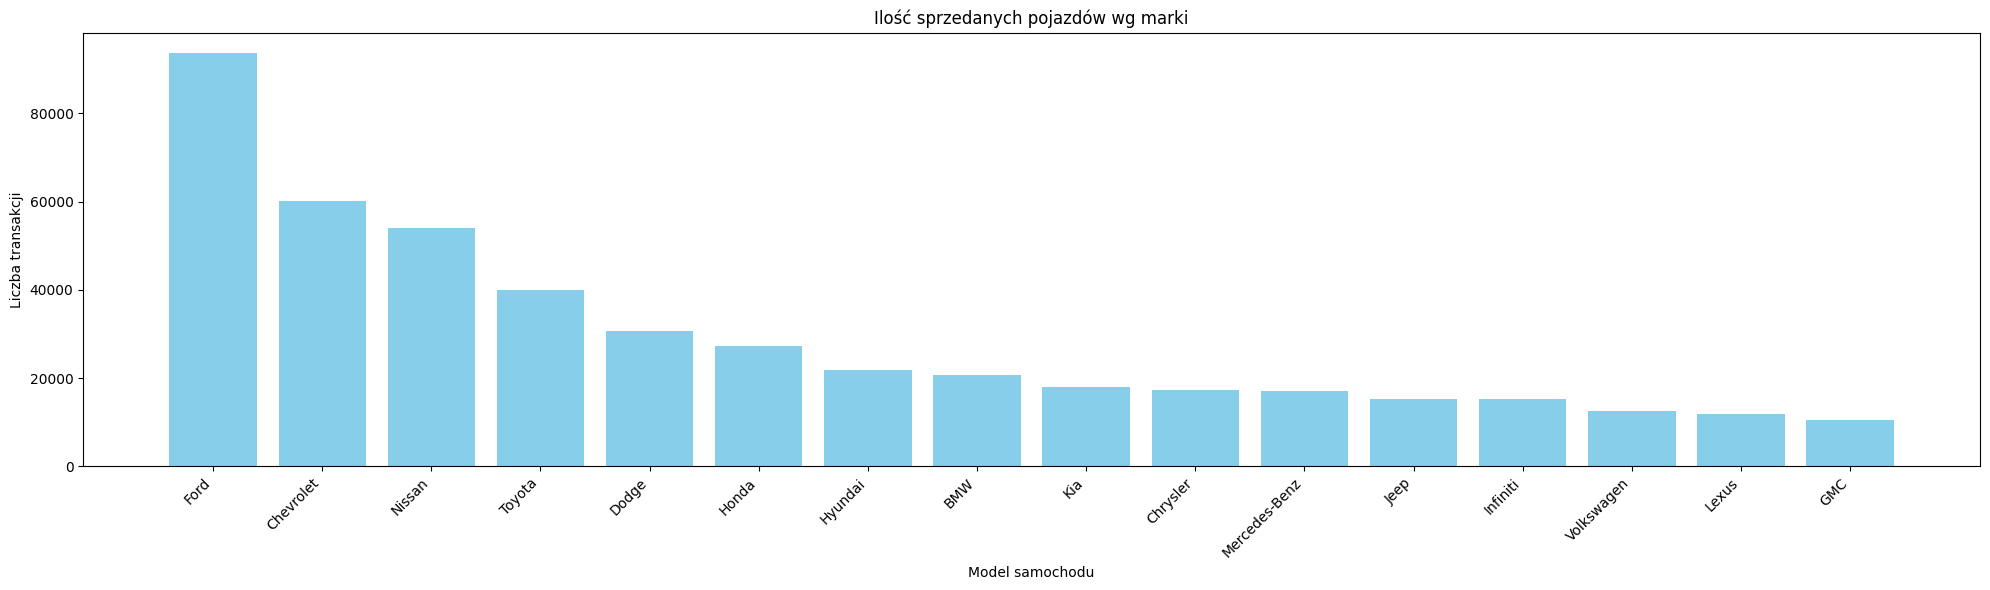

In [51]:
model_car_sum = database['make'].value_counts()
model_car_filtered = model_car_sum[model_car_sum>500]

plt.figure(figsize=(20, 6))
plt.bar(model_car_filtered.index, model_car_filtered.values, color='skyblue')
plt.xlabel('Model samochodu')
plt.ylabel('Liczba transakcji')
plt.title('Ilość sprzedanych pojazdów wg marki')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [24]:
database.head(3)

,year,make,model,trim,body,transmission,vin,state,condition,odometer,color,interior,seller,mmr,sellingprice,saledate
0,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg566472,ca,5.0,16639.0,white,black,kia motors america inc,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
1,2015,Kia,Sorento,LX,SUV,automatic,5xyktca69fg561319,ca,5.0,9393.0,white,beige,kia motors america inc,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST)
2,2014,BMW,3 Series,328i SULEV,Sedan,automatic,wba3c1c51ek116351,ca,45.0,1331.0,gray,black,financial services remarketing (lease),31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST)


make
Acura             85829.219285
Audi              66039.752386
BMW               64297.520660
Bentley           39239.698276
Buick             79002.161569
Cadillac          83391.753292
Chevrolet         76896.387817
Chrysler          65528.274343
Dodge             72498.271884
FIAT              25357.864740
Ford              63507.202269
GMC               84536.825464
HUMMER           103136.089441
Honda             80331.697279
Hyundai           51174.776861
Infiniti          45859.775600
Isuzu            140132.225490
Jaguar            68766.014789
Jeep              69804.496845
Kia               46014.077289
Land Rover        58310.501441
Lexus             69228.991906
Lincoln           62516.315095
MINI              48127.116625
Maserati          29630.736842
Mazda             65365.987681
Mercedes-Benz     62415.016746
Mercury          113475.936181
Mitsubishi        75600.746377
Nissan            56219.019761
Oldsmobile       139822.480769
Pontiac          117825.348987
Por

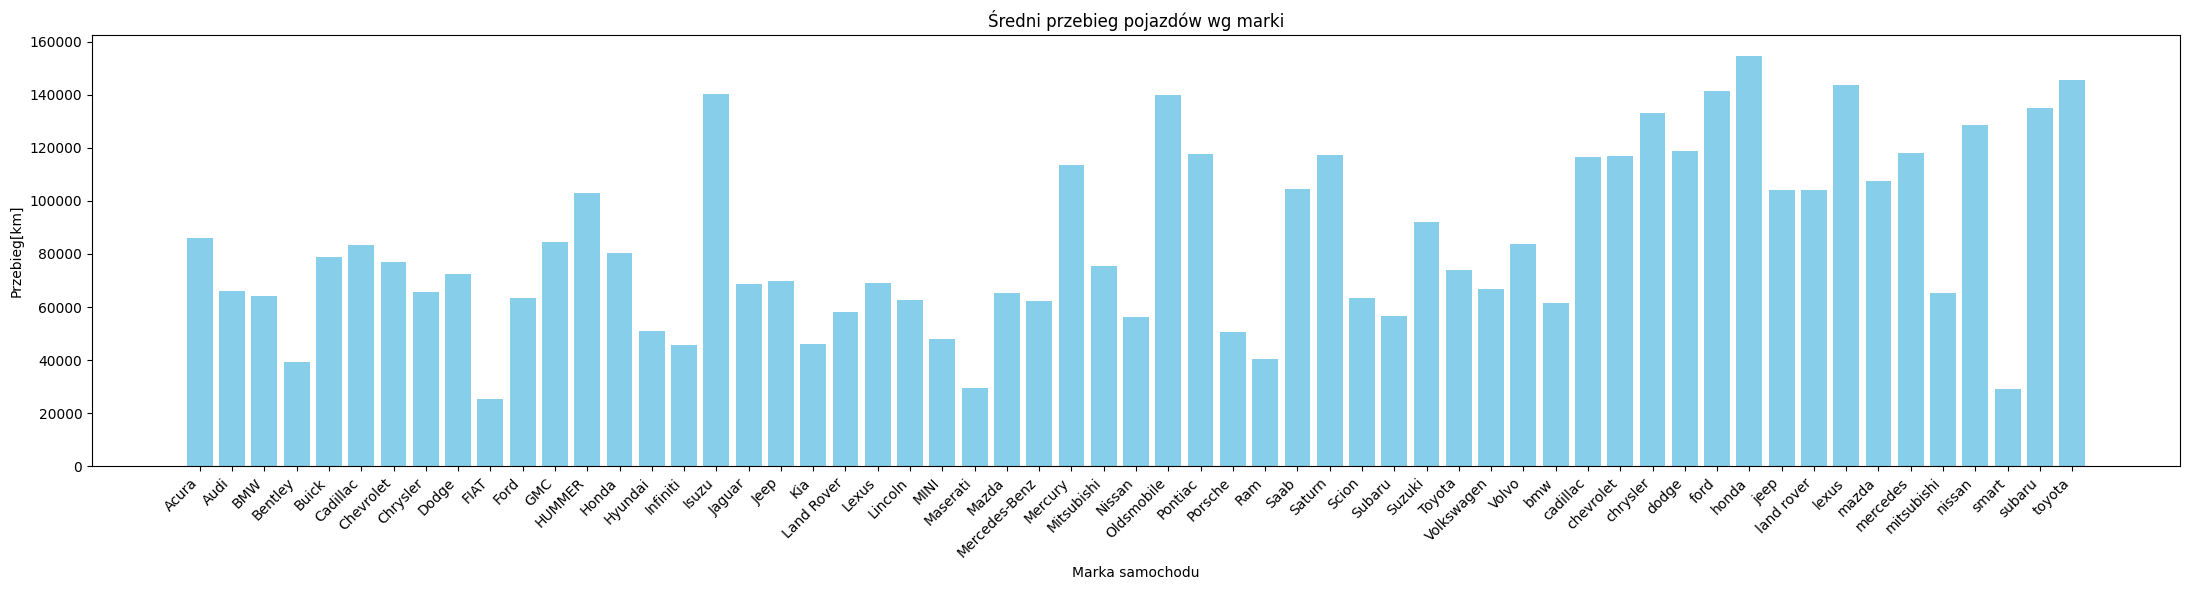

In [47]:
# model_odometer = database['odometer'].value_counts()
# print(database.groupby('make')['odometer'].mean())
# mean_odometer = database.groupby('odometer')['make'].mean()
mean_odometer = database.groupby('make')['odometer'].mean()
print(mean_odometer)

plt.figure(figsize=(22, 6))
plt.bar(mean_odometer.index, mean_odometer.values, color='skyblue')
plt.xlabel('Marka samochodu')
plt.ylabel('Przebieg[km]')
plt.title('Średni przebieg pojazdów wg marki')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()
